In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [2]:
img = cv2.imread('Plaksha_Faculty.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')



In [3]:
text = "Face Detected"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)
font_thickness = 1
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

In [4]:
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

    cv2.putText(img, text, (x, y-5),
                font, font_scale,
                font_color, font_thickness)


Total number of face detected are 30


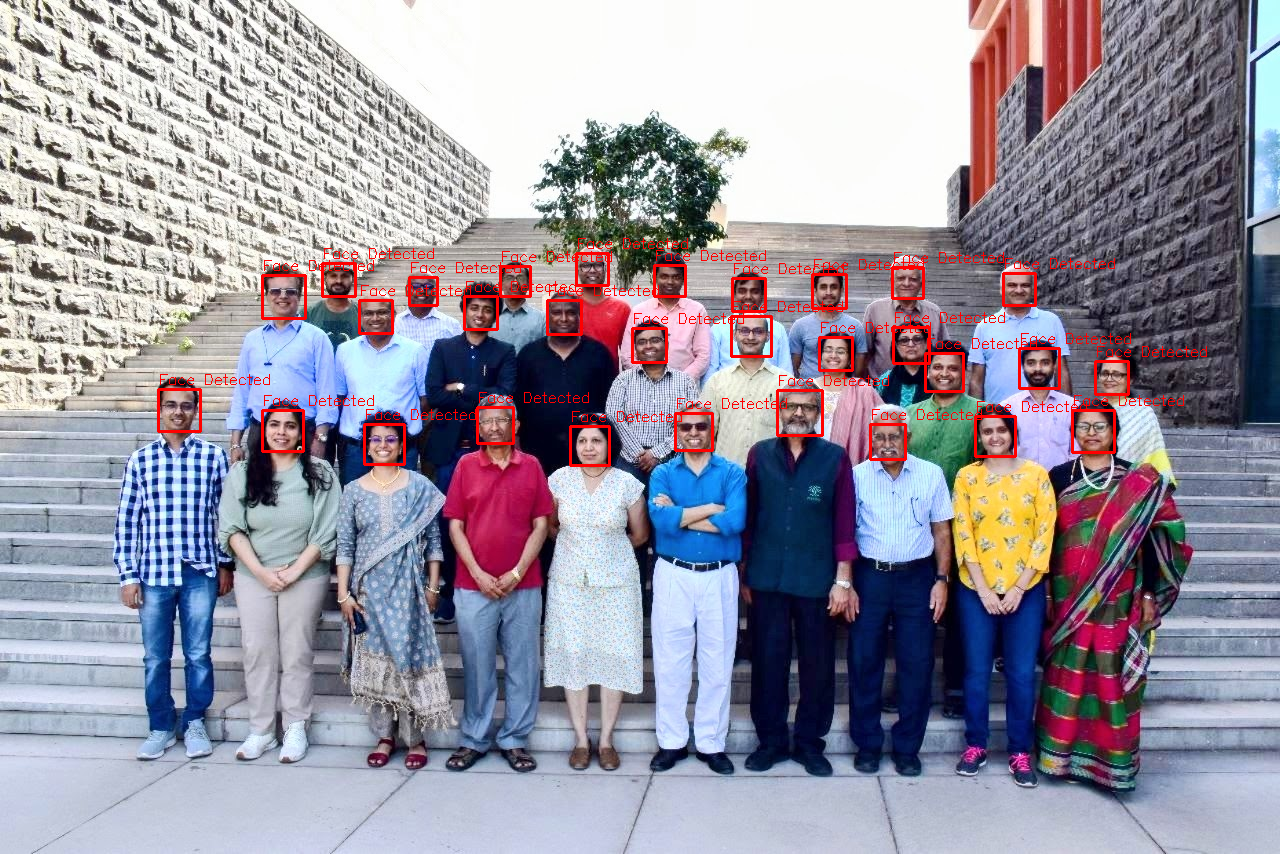

In [5]:
from google.colab.patches import cv2_imshow ## asked ai to help me fix this as was showing error
window_title = "Total number of face detected are " + str(len(faces_rect))
print(window_title)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)
hue_saturation = np.array(hue_saturation)

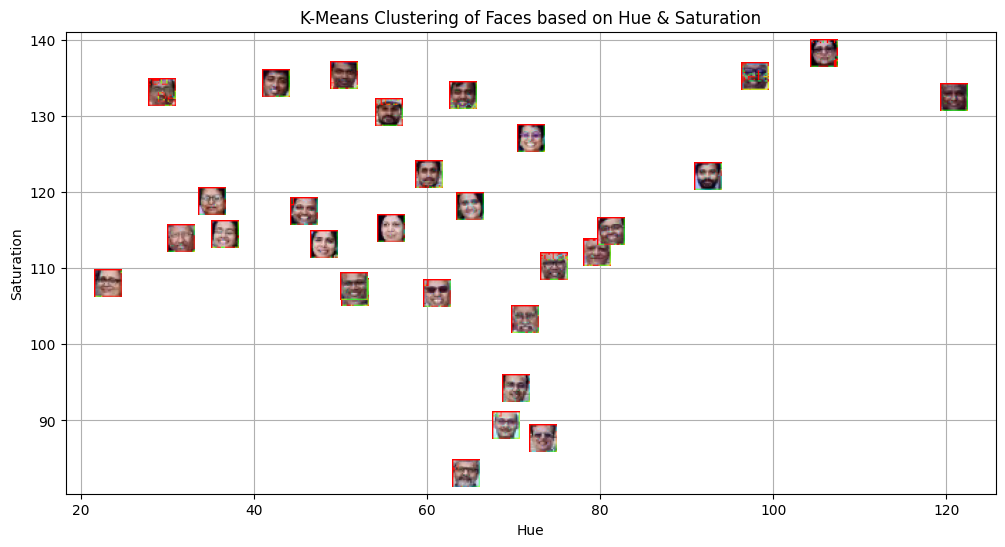

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x,y,w,h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_title("K-Means Clustering of Faces based on Hue & Saturation")
ax.grid(True)

plt.show()

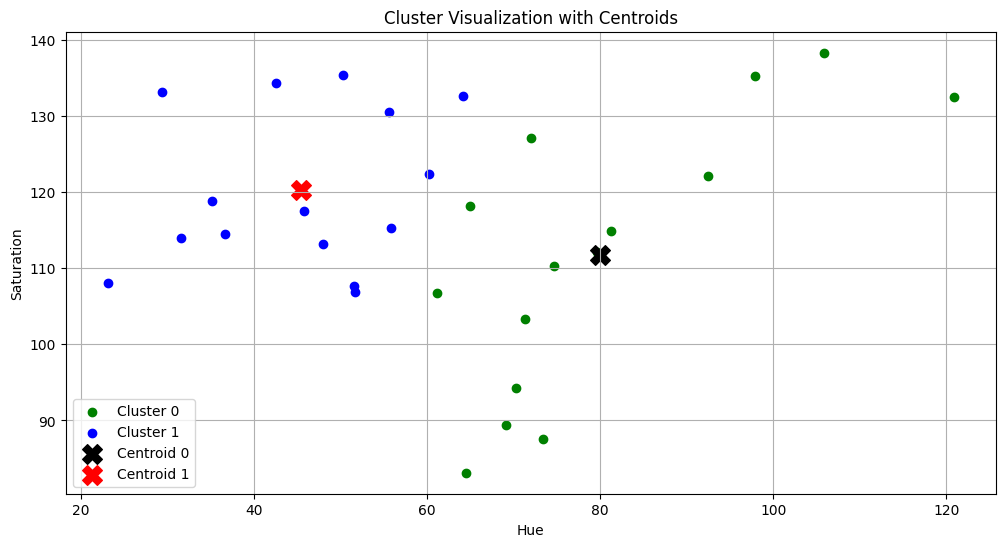

In [8]:
legend_labels = []
cluster_0_points = []
cluster_1_points = []
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1],
            color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1],
            color='blue', label='Cluster 1')

centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1],
            color='black', marker='X', s=200, label='Centroid 0')

plt.scatter(centroid_1[0], centroid_1[1],
            color='red', marker='X', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Cluster Visualization with Centroids")
plt.legend()
plt.grid(True)
plt.show()

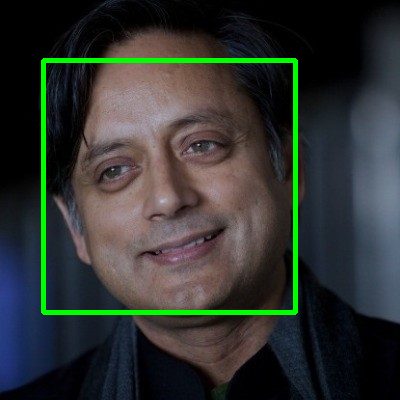

In [9]:

template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 5)

for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2_imshow(template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

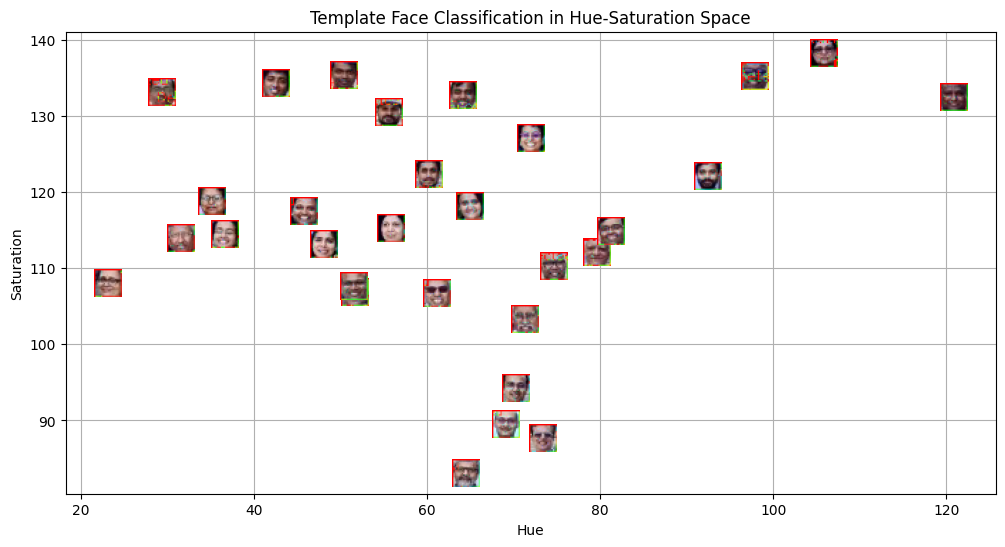

In [10]:

template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

(x, y, w, h) = template_faces[0]
face = template_hsv[y:y+h, x:x+w]

template_hue = np.mean(face[:,:,0])
template_saturation = np.mean(face[:,:,1])


template_label = kmeans.predict([[template_hue, template_saturation]])[0]


fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

color = 'red' if template_label == 0 else 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_title("Template Face Classification in Hue-Saturation Space")
ax.grid(True)

plt.show()

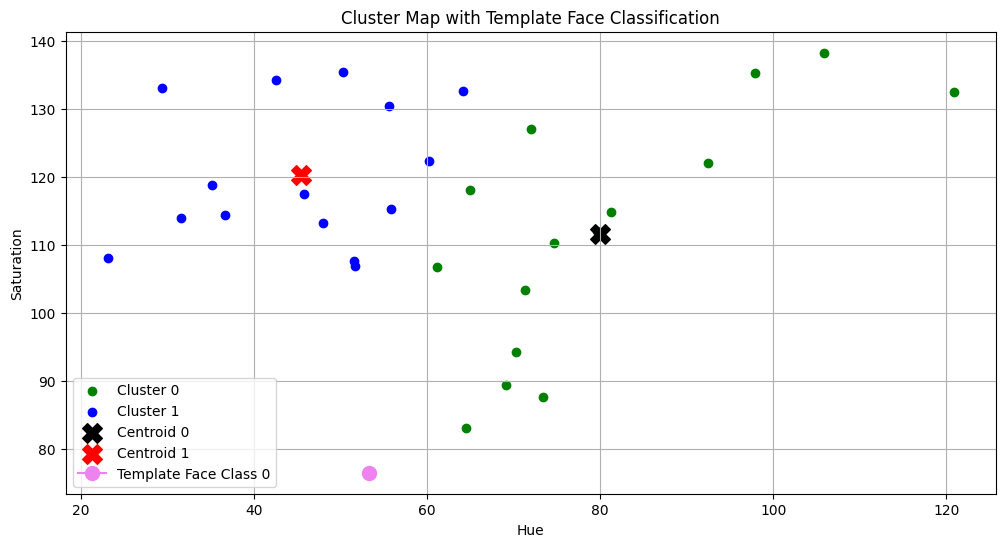

In [11]:

legend_labels = []

cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1],
            color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1],
            color='blue', label='Cluster 1')


centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1],
            marker='X', s=200, color='black', label='Centroid 0')

plt.scatter(centroid_1[0], centroid_1[1],
            marker='X', s=200, color='red', label='Centroid 1')


plt.plot(template_hue, template_saturation,
         marker='o', c='violet', markersize=10,
         label='Template Face Class {}'.format(template_label))

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Cluster Map with Template Face Classification")
plt.legend()
plt.grid(True)
plt.show()

ques1.
Distance based classification algorithms use mathematical formulas to calculate the level of similarity or dissimilarity between two or more points. The distance measurements used by the algorithm can be classified into several types, including Euclidean distance, Manhattan distance, Minkowski distance, Cosine similarity, and Hamming distance. These measurements enable the algorithm to locate the nearest points to a given point and classify it.

ques2.
Distance-based classification methods are widely used in real-world applications where similarity between data points is important. They are used in face recognition and image matching systems, handwriting recognition, recommendation systems such as those used by streaming platforms, medical diagnosis for identifying patients with similar symptoms, fraud detection to identify abnormal financial transactions, and spam filtering to detect emails similar to known spam messages.

ques3.
Distance-based classification algorithms utilize mathematical formulas to assess how similar or distinct data points are. The general distance measures used by this classification of algorithms include Euclidean Distance, Manhattan Distance, Minkowski Distance, Cosine Distance, and Hamming Distance. These formulas allow the algorithm to identify similar data points to a given point and classify it accordingly.

ques4.
The technique of cross-validation is used to check the performance of the machine learning model. Instead of simply dividing the data set into training sets and testing sets, the technique of cross-validation divides the data set into subsets. The model is tested on these subsets of the data set. The technique of cross-validation is used to check if the model is overfitting. The model can perform better with the use of cross-validation.

ques5.

The technique of cross-validation is used to check the performance of the machine learning model. Instead of simply dividing the data set into training sets and testing sets, the technique of cross-validation divides the data set into subsets. The model is tested on these subsets of the data set. The technique of cross-validation is used to check if the model is overfitting. The model can perform better with the use of cross-validation.